0.9333333333333333 0.9333333333333332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



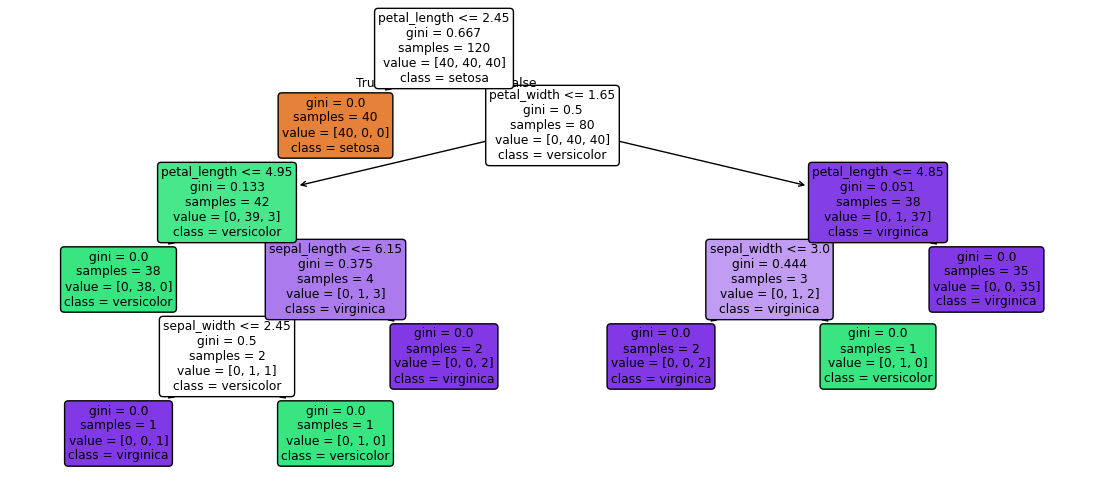

0.9666666666666667 0.9665831244778612


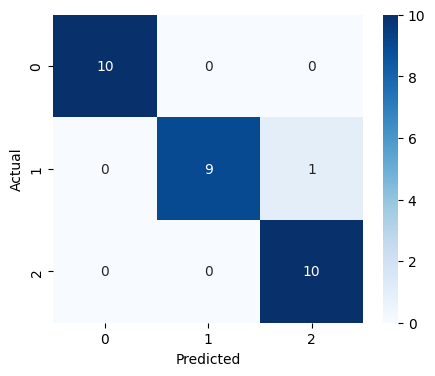

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("1) iris.csv")
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print(acc, f1)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(14,6))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()

pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned.fit(X_train, y_train)
y_pred_pruned = pruned.predict(X_test)

acc_p = accuracy_score(y_test, y_pred_pruned)
f1_p = f1_score(y_test, y_pred_pruned, average="macro")

print(acc_p, f1_p)

cm = confusion_matrix(y_test, y_pred_pruned)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
print("Model expects these features:")
print(list(X.columns))

sample = {
    "sepal length (cm)": 5.8,
    "sepal width (cm)": 3.8,
    "petal length (cm)": 1.9,
    "petal width (cm)": 0.3
}

sample_df = pd.DataFrame([sample])
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

try:
    if 'scaler' in globals() and 'num_cols_to_scale' in globals() and num_cols_to_scale:
        sample_df[num_cols_to_scale] = scaler.transform(sample_df[num_cols_to_scale])
except Exception as e:
    print("Scaler transform failed:", e)

pred_class = model.predict(sample_df)[0]
pred_species = le.inverse_transform([pred_class])[0]
print("Predicted species:", pred_species)


Model expects these features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Predicted species: setosa


In [11]:
samples = pd.DataFrame([
    {"sepal length (cm)": 5.1, "sepal width (cm)": 3.5, "petal length (cm)": 1.4, "petal width (cm)": 0.2},
    {"sepal length (cm)": 6.2, "sepal width (cm)": 3.4, "petal length (cm)": 5.4, "petal width (cm)": 2.3}
])

samples = samples.reindex(columns=X.columns, fill_value=0)

try:
    if 'scaler' in globals() and 'num_cols_to_scale' in globals() and num_cols_to_scale:
        samples[num_cols_to_scale] = scaler.transform(samples[num_cols_to_scale])
except Exception as e:
    print("Scaler transform failed:", e)

preds = model.predict(samples)
print(le.inverse_transform(preds))


['setosa' 'setosa']
